In [38]:
cd "/content/file"

/content/file


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:


import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
!pip install -q snscrape==0.3.4

In [4]:
import os
import pandas as pd
from datetime import date

In [11]:
today = date.today()
end_date = today
search_term = '#harcelement'
from_date = '2022-01-01'
max_results = 1000

# Extraction des tweets avec le mot clé harcelement

In [ ]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > /content/harcele.txt"
os.system(extracted_tweets)
if os.stat("/content/harcele.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('/content/harcele.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

# **Labelisation**

In [ ]:
# install detoxify

!pip install detoxify


In [ ]:
from detoxify import Detoxify
import pandas as pd


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
df = pd.read_fwf("/content/drive/MyDrive/Journee_observation/harcele.txt")
df = df[["Texte"]]
df

,Texte
0,'#harcèlement judiciaire contre #lecourrierdes...
1,'#zidane #harcelement #micronouvelle https://t...
2,"""@TF1Info @TF1 @FondHopitaux @GillesBouleau @p..."
3,'@carambar_2024 @MatthieuMERIOT Passe ton chem...
4,'Voilà !! \n\n#cynthiaargaillot à copié ces mé...
...,...
9993,"""#ChiffreClé | 1️⃣ femme sur 6️⃣ dans le monde..."
9994,"""Où sont dc passée l indignation de ces femmes..."
9995,'@booba @MagaliBerdah Tu ne fais guerre mieux ...
9996,"""Marc Blata ,qui parle de qui est véritablemen..."


In [ ]:
df.isna().sum()

Texte    0
dtype: int64

In [ ]:

detox = Detoxify('original', device='cuda')

for index, row in df.iterrows():
    text = row["Texte"]
    output = detox.predict(text)
    for cle, valeur in output.items():
      if cle == "toxicity" and valeur >=0.001:
        df.at[index, "label"] = 1
      elif cle== "identity_attack" and valeur <0.001:
        df.at[index, "label"] = 0

In [ ]:
cd "/content/drive/MyDrive/Journee_observation"

/content/drive/MyDrive/Journee_observation


In [ ]:
df.to_csv("data.csv")

**Importer les données dans une base de donnée mongodb**

In [33]:
import pandas as pd
import json
from pymongo import MongoClient
import pymongo
import requests
from time import sleep
import urllib.request
import os

def mongoimport(csv_path, db_name, coll_name, db_url='localhost', db_port=27017):


    client = MongoClient(db_url, db_port)
    db = client[db_name]
    coll = db[coll_name]
    data = pd.read_csv(csv_path)
    payload = json.loads(data.to_json(orient='records'))
    coll.insert_many(payload)
    return coll.count()

In [ ]:
csv_path = "/content/drive/MyDrive/Journee_observation/data.csv"

db_name = "Ollodata"
coll_name = "twitter"

mongoimport(csv_path, db_name, coll_name, db_url='localhost', db_port=27017)

# **EDA**

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Journee_observation/data.csv")
df = df[["Texte","label"]]
df

,Texte,label
0,'#harcèlement judiciaire contre #lecourrierdes...,0.0
1,'#zidane #harcelement #micronouvelle https://t...,0.0
2,"""@TF1Info @TF1 @FondHopitaux @GillesBouleau @p...",0.0
3,'@carambar_2024 @MatthieuMERIOT Passe ton chem...,0.0
4,'Voilà !! \n\n#cynthiaargaillot à copié ces mé...,1.0
...,...,...
9993,"""#ChiffreClé | 1️⃣ femme sur 6️⃣ dans le monde...",0.0
9994,"""Où sont dc passée l indignation de ces femmes...",0.0
9995,'@booba @MagaliBerdah Tu ne fais guerre mieux ...,0.0
9996,"""Marc Blata ,qui parle de qui est véritablemen...",0.0


In [44]:
df.head()

,Texte,label
0,'#harcèlement judiciaire contre #lecourrierdes...,0.0
1,'#zidane #harcelement #micronouvelle https://t...,0.0
2,"""@TF1Info @TF1 @FondHopitaux @GillesBouleau @p...",0.0
3,'@carambar_2024 @MatthieuMERIOT Passe ton chem...,0.0
4,'Voilà !! \n\n#cynthiaargaillot à copié ces mé...,1.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Texte   9998 non-null   object 
 1   label   9998 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


In [46]:
df['label'] = df['label'].apply(lambda x: 0 if x == 0.0 else x)
df['label'] = df['label'].apply(lambda x: 1 if x == 1.0 else x)
df['label'] = df['label'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Texte   9998 non-null   object
 1   label   9998 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.3+ KB


In [47]:
df['label'].describe()

count    9998.000000
mean        0.072615
std         0.259516
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64

In [48]:
import matplotlib.pyplot as plt

In [49]:
df['label'].value_counts(normalize=True)

0    0.927385
1    0.072615
Name: label, dtype: float64

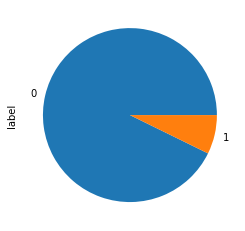

In [50]:
df['label'].value_counts(normalize=True).plot.pie()

In [51]:
df['label'].value_counts(normalize=True)

0    0.927385
1    0.072615
Name: label, dtype: float64

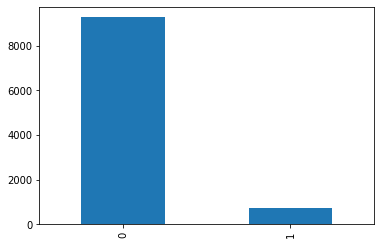

In [52]:
df['label'].value_counts().plot(kind='bar')

In [76]:
df['label'].isna().sum()

0

sppression des emojiis

In [53]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [54]:
df["Texte"] = df["Texte"].apply(remove_emoji)

In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download('stopwords')

STOPWORDS = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

In [59]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+ _]')

def clean_text(text):
    text = text.lower() 
    text = space.sub(' ', text) 
    text = symbols.sub('', text)
    text = text.replace('x', '')
    text = re.sub(r'\+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text

In [60]:
df['Texte'] = df['Texte'].apply(clean_text)

In [61]:
df['Texte']

0       #harclement judiciaire contre #lecourrierdesst...
1       #zidane #harcelement #micronouvelle https tco ...
2       tf1info tf1 fondhopitau gillesbouleau piecesja...
3       carambar_2024 matthieumeriot passe chemin va a...
4       voil nn#cynthiaargaillot copi mthodes#pierrefi...
                              ...                        
9993    #chiffrecl 1 femme 6 monde cherche d#emploi pa...
9994    o dc passe indignation femmes si fministes con...
9995    booba magaliberdah fais guerre mieu citer boob...
9996    marc blata parle vritablement magalie berdahnl...
9997    quand dit vrais victimes lharclement celles cr...
Name: Texte, Length: 9998, dtype: object

In [62]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('french'))

def clean_(text):
    text = text.lower() 
    text = space.sub(' ', text) 
    text = symbols.sub('', text) 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text

In [63]:
df['Texte'] = df['Texte'].apply(clean_)

In [64]:
df

,Texte,label
0,#harclement judiciaire contre #lecourrierdesst...,0
1,#zidane #harcelement #micronouvelle https tco ...,0
2,tf1info tf1 fondhopitau gillesbouleau piecesja...,0
3,carambar_2024 matthieumeriot passe chemin va a...,0
4,voil nn#cynthiaargaillot copi mthodes#pierrefi...,1
...,...,...
9993,#chiffrecl 1 femme 6 monde cherche d#emploi pa...,0
9994,o dc passe indignation femmes si fministes con...,0
9995,booba magaliberdah fais guerre mieu citer boob...,0
9996,marc blata parle vritablement magalie berdahnl...,0


In [65]:
# Données d'entraînement et de test
from sklearn.model_selection import train_test_split
seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    df['Texte'],
    df['label'],
    test_size = 0.2,
    random_state = seed
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7998,)
y_train shape: (7998,)
X_test shape: (2000,)
y_test shape: (2000,)


In [66]:
X_train

8550    florence chappert responsable dpartement eprim...
918     cest parti ambassadeurs contre #harcelement in...
8328    rousselfabrice nantesmetropole atout_france le...
4582    #seisme #france #misogyne #harcelement #femme ...
6497    jordanesnault_ eclaireurc recherches didesnvou...
                              ...                        
9785    #harclement #tpmp simple touch harcle fils fra...
7763    academie_paris #harcelement #harcelementalecol...
5218    stopworkplacebu eactly my supervisor asks a do...
1346    peut tre trs difficile faire face personne tin...
3582    #viemaviedegardien pisode #harcelement nmais p...
Name: Texte, Length: 7998, dtype: object

In [67]:
y_train

8550    0
918     0
8328    0
4582    1
6497    0
       ..
9785    0
7763    0
5218    0
1346    1
3582    0
Name: label, Length: 7998, dtype: int64

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X_train_content_vec = vectorizer.fit_transform(X_train)
X_test_content_vec = vectorizer.transform(X_test)

In [69]:
X_train_content_vec

<7998x35366 sparse matrix of type '<class 'numpy.int64'>'
	with 146612 stored elements in Compressed Sparse Row format>

In [70]:
X_test_content_vec

<2000x35366 sparse matrix of type '<class 'numpy.int64'>'
	with 29539 stored elements in Compressed Sparse Row format>

In [71]:
vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000enfants',
 '000nnhttps',
 '001',
 '009',
 '01',
 '013hvskuyt',
 '0169304014n',
 '0172624621',
 '0187443632n',
 '0189613453',
 '01olyom8af',
 '02',
 '0251754713n',
 '02556020',
 '02985nn',
 '02jrpohgkg',
 '02qkfbefwy',
 '02zjznig1c',
 '03',
 '04',
 '040ivrgjyfn',
 '04816838',
 '04816870',
 '04qjoucvoo',
 '04vek2yqwf',
 '05',
 '05aj6mhrug',
 '05beolppii',
 '06',
 '0628517913',
 '0643615887',
 '067wccepj',
 '06ccpuinpz',
 '06nle',
 '07',
 '0783887455',
 '08',
 '0800',
 '08cf7jqk0m',
 '08hghqpzyi',
 '09',
 '0917h',
 '09h17h',
 '09n',
 '09nrservations',
 '09qniljap',
 '09zoqsqpv',
 '0ada3ejzgz',
 '0agwhn0tls',
 '0avencenft',
 '0aw4jz6pgf',
 '0b1ltiuztj',
 '0bk84b3hp6',
 '0bkqq8gycm',
 '0bt37bw5as',
 '0byjbnq5d9',
 '0bz60thcz6',
 '0c67c69mme',
 '0cfutbfqkf',
 '0db5zhltvc',
 '0dtoeol9e',
 '0dtuclorlk',
 '0duqg1ikis',
 '0ecn1wybql',
 '0ehjct94ni',
 '0f0rdknlr',
 '0gdpuqtlev',
 '0gkrnpotv1',
 '0gkwrhcumm',
 '0gqwwfsr96',
 '0hl8nbddl',
 '0ht7omtqwn',
 '0iz8erswi6',
 '0jnbsagg

In [72]:
len(vectorizer.get_feature_names_out())

35366

In [73]:
X_train_content = pd.DataFrame(
    X_train_content_vec.toarray(),
    columns = vectorizer.get_feature_names_out()
)
X_train_content

,00,000,000enfants,000nnhttps,001,009,01,013hvskuyt,0169304014n,0172624621,...,zyugwcvjj4,zyv6kusvyc,zywk0tadnl,zz3jsgnrte,zz4cjsjlyc,zz5k1jjyig,zz97bpqhgy,zzjmksfwl7,zzqu4t3m,zzzpdcvas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_test_content = pd.DataFrame(
    X_test_content_vec.toarray(),
    columns = vectorizer.get_feature_names_out()
)
X_test_content

,00,000,000enfants,000nnhttps,001,009,01,013hvskuyt,0169304014n,0172624621,...,zyugwcvjj4,zyv6kusvyc,zywk0tadnl,zz3jsgnrte,zz4cjsjlyc,zz5k1jjyig,zz97bpqhgy,zzjmksfwl7,zzqu4t3m,zzzpdcvas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Modelisation avec random forest**

Les forêts aléatoires combinent plusieurs arbres de décision pour faire des prédictions. 

Les forêts aléatoires sont plus robustes aux données bruyantes ou aberrantes car elles utilisent la moyenne des prédictions de plusieurs arbres pour faire des prédictions.

Les forêts aléatoires peuvent gérer efficacement à la fois des variables continues et catégorielles, ce qui est souvent le cas pour les données de textes utilisées pour l'analyse de sentiments.

Ils permettent de mesurer l'importance relative de chaque feature et d'estimer les interactions.

Les forêts aléatoires peuvent facilement gérer des données manquantes dans les entrées grace au bagging.


In [80]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [82]:
rfc=RandomForestClassifier(random_state=seed)

In [83]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_content_vec, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [84]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [85]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [86]:
rfc1.fit(X_train_content_vec, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [87]:
pred=rfc1.predict(X_test_content)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [88]:
from sklearn.metrics import accuracy_score

print("Accuracy pour Random Forest : ",accuracy_score(y_test,pred))

Accuracy pour Random Forest :  0.9195


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc1.predict(X_test_content)))

In [102]:
cd "/content/drive/MyDrive/Journee_observation/randomForest"

/content/drive/MyDrive/Journee_observation/randomForest


In [92]:
from joblib import dump

dump(vectorizer,"vectors.joblib")
dump(rfc1,"model.joblib")

['model.joblib']

In [105]:
import pickle

pickle.dump(rfc1, open("model_randomm.pkl", "wb"))

**Modelisation arbre de decision**

J'ai utilisé les arbres de decisions car ce n'est pas difficile à iinterpréter (donc comprendre).
Ils représentent les décisions prises pour arriver à une prédiction sous forme de règles simples et compréhensibles

Ils permettent de gerer efficacement les variables catégorielles.

Les arbres de décision peuvent être entraînés et utilisés pour faire des prédictions très rapidement, ce qui est souvent souhaitable pour les applications en temps réel.



In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier()

depth_grid = [1, 3, 5, 10, 20, 30, 40, 50, None] 

parameters = {'max_depth': depth_grid} 

clf_tree_grid = GridSearchCV(clf, parameters, cv=5)

clf_tree_grid.fit(X_train_content_vec, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 10, 20, 30, 40, 50, None]})

In [96]:
clf_tree_grid.best_params_

{'max_depth': 5}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [97]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=None, random_state=42)

In [98]:
clf.fit(X_train_content_vec, y_train)

predictions = clf.predict(X_test_content)
print("Accuracy:", accuracy_score(y_test, predictions))


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.94


In [99]:
print(classification_report(y_test, clf.predict(X_test_content)))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1839
           1       0.82      0.33      0.47       161

    accuracy                           0.94      2000
   macro avg       0.88      0.66      0.72      2000
weighted avg       0.93      0.94      0.93      2000



In [106]:
cd "/content/drive/MyDrive/Journee_observation/Arbredecision"

/content/drive/MyDrive/Journee_observation/Arbredecision


In [101]:
from joblib import dump

dump(vectorizer,"vectors.joblib")
dump(rfc1,"modelAbre.joblib")

['modelAbre.joblib']

In [107]:
import pickle

pickle.dump(clf, open("model_arbre.pkl", "wb"))

**Modelisation LSTM**

In [ ]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(df['Texte'], df['label'], test_size=0.2, random_state=seed)

X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(X_train_bert, y_train_bert, test_size=0.25, random_state=seed) 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

train_x, test_x, train_y, test_y = train_test_split(df['Texte'], df['label'], test_size=0.2, random_state=seed)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_x)
train_x = tokenizer.texts_to_sequences(train_x)
test_x = tokenizer.texts_to_sequences(test_x)

maxlen = 100
train_x = pad_sequences(train_x, padding='post', maxlen=maxlen)
test_x = pad_sequences(test_x, padding='post', maxlen=maxlen)



In [ ]:
train_x.shape

(7998, 100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          3532700   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,613,201
Trainable params: 3,613,201
Non-trainable params: 0
_________________________________________________________________


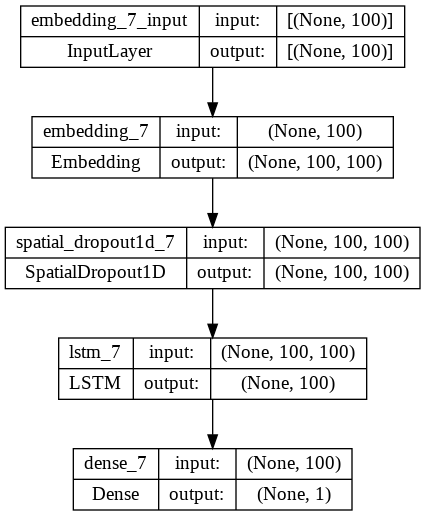

In [ ]:
from tensorflow import keras

model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 100, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
keras.utils.plot_model(model, "model.png",show_shapes=True)


In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optim, loss=loss_func, metrics=[acc])
keras.utils.plot_model(model, "my_first_model.png",show_shapes=True)


In [ ]:
# entraînement
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
hist = model.fit(train_x, train_y, batch_size=32, epochs=5, validation_data=(test_x, test_y), callbacks=[early_stopping])


Epoch 1/5
250/250 [==============================] - 105s 410ms/step - loss: 0.2670 - accuracy: 0.9291 - val_loss: 0.2844 - val_accuracy: 0.9195
Epoch 2/5
250/250 [==============================] - 117s 467ms/step - loss: 0.2561 - accuracy: 0.9294 - val_loss: 0.2801 - val_accuracy: 0.9195
Epoch 3/5
250/250 [==============================] - 99s 396ms/step - loss: 0.2566 - accuracy: 0.9294 - val_loss: 0.2806 - val_accuracy: 0.9195
Epoch 4/5
250/250 [==============================] - 96s 382ms/step - loss: 0.2557 - accuracy: 0.9294 - val_loss: 0.2800 - val_accuracy: 0.9195
Epoch 5/5
250/250 [==============================] - 97s 388ms/step - loss: 0.2563 - accuracy: 0.9294 - val_loss: 0.2800 - val_accuracy: 0.9195


In [ ]:
model.save('/content/drive/MyDrive/Journee_observation/model')

# **Deploiement**

In [ ]:
!pip install colabcode
!pip install fastapi

from colabcode import ColabCode
from fastapi import FastAPI

import pickle
import logging
!pip install fastapi
from fastapi import FastAPI

from typing import Optional
from joblib import load
from pydantic import BaseModel
app = FastAPI()

In [ ]:
cc = ColabCode(port=12000, code=False)
app = FastAPI()


%%writefile models.py
from pydantic import BaseModel, conlist
from typing import List


class Iris(BaseModel):
    data: List[conlist(float, min_items=4, max_items=4)]

In [ ]:
vector = load("/content/drive/MyDrive/Journee_observation/Arbredecision/vectors.joblib")
model = load("/content/drive/MyDrive/Journee_observation/Arbredecision/modelAbre.joblib")

class get_review(BaseModel):
    review :str

@app.get("/")
def read_root():
    return {"Hello": "World"}


@app.post("/prediction")
def get_prediction(gr:get_review):
    text = [gr.review]
    vec = vector.transform(text)
    prediction = model.predict(vec)
    prediction = int(prediction)
    if prediction >0:
        prediction="positive"
    else:
        prediction = "negative"

    return {"sentence":gr.review,"prediction":prediction}


In [ ]:
cc.run_app(app=app)